### Fitted a 3 cluster model after simulating 1000 points from a bivariate normal distribution to investigate K-Means and clustering algorithms. Then, modified each point in the data to move 1% closer to its assigned cluster center & repeated the clustering analysis 50 times. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import copy
from __future__ import division

In [3]:
np.random.seed(42)
rand_cov = np.array([[1,0],[0,1]], np.int32)
rand = np.random.multivariate_normal(mean =[0,0], cov=rand_cov, size=1000)

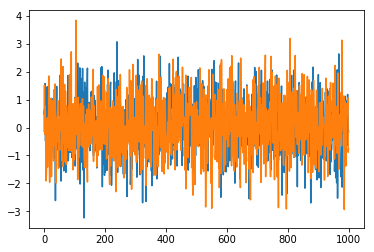

In [4]:
plt.plot(rand)

In [5]:
kmeans = KMeans(n_clusters = 3, random_state=0).fit(rand)

[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 ...
 [ 0.35144821  1.07015024]
 [-0.02652126 -0.88187465]
 [-0.16306696 -0.74490264]]


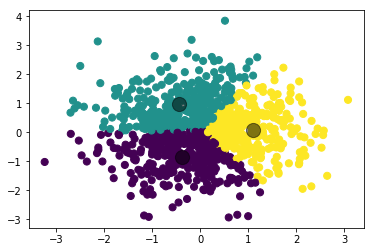

In [6]:
y_kmeans = kmeans.predict(rand)
old_rand = copy.copy(rand)
print rand
plt.scatter(rand[:, 0], rand[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

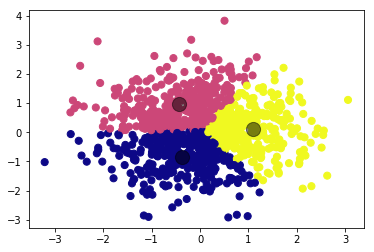

In [158]:
i = 0
while i < len(y_kmeans):
    rand[i,0] = rand[i,0]*0.99+.01*centers[y_kmeans[i],0]
    rand[i,1] = rand[i,1]*0.99+.01*centers[y_kmeans[i],1]
    i += 1
kmeans = KMeans(n_clusters = 3, random_state=0).fit(rand)
y_kmeans = kmeans.predict(rand)
plt.scatter(rand[:, 0], rand[:, 1], c=y_kmeans, s=50, cmap='plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [159]:
j = 0
while j < 50:
    i = 0
    while i < len(y_kmeans):
        rand[i,0] = rand[i,0]*0.99+.01*centers[y_kmeans[i],0]
        rand[i,1] = rand[i,1]*0.99+.01*centers[y_kmeans[i],1]
        i += 1
    kmeans = KMeans(n_clusters = 3, random_state=0).fit(rand)
    y_kmeans = kmeans.predict(rand) 
    j += 1

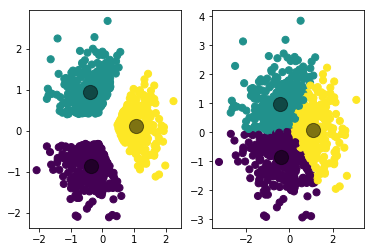

In [160]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(rand[:, 0], rand[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

kmeans1 = KMeans(n_clusters = 3, random_state=0).fit(old_rand)
y_kmeans1 = kmeans1.predict(old_rand)
ax2.scatter(old_rand[:, 0], old_rand[:, 1], c=y_kmeans1, s=50, cmap='viridis')
centers1 = kmeans1.cluster_centers_
ax2.scatter(centers1[:, 0], centers1[:, 1], c='black', s=200, alpha=0.5)

The scatter plot on the right shows the data plot after repeated clustering with 50 iterations. The data points are now far more segmented and we see clear clusters with the cloud that has expanded, as opposed to the initial plot on the right. With defined centers, and clear clusters we can then move forward with applying classification or other techniques that separate the data set. 